In [27]:
import numpy as np # for arrays
import pandas as pd # for data frame
import matplotlib.pyplot as plt # for plots and graphs
import seaborn as sns # for plots
import sklearn.datasets # sklearn is machine learning libraby, we will import the BOSTON dataset from sklearn.dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics # for evaluating our model

Importing the BOSTON HOUSE PRICE data

In [28]:
house_price_dataset = pd.read_csv(r'C:\resources\flutter-apps\flutter_universe\Housing project\BostonHousing.csv')

print(house_price_dataset)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [29]:
house_price_dataset.shape

(506, 14)

In [30]:
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
# checking for missing values
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Understanding correlation between various features in the dataset

<Axes: >

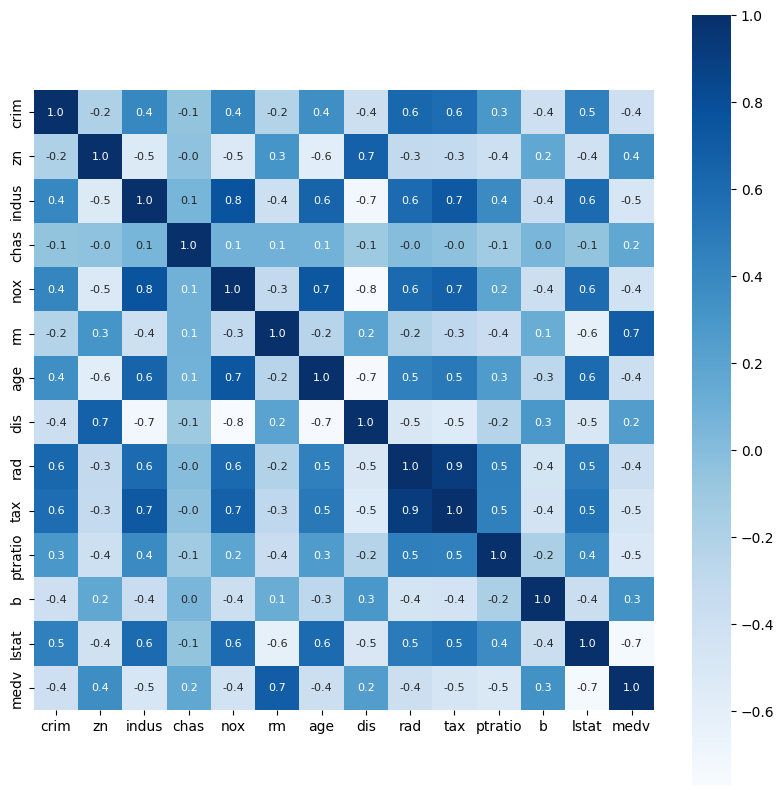

In [33]:
correlation = house_price_dataset.corr()
#constructing a heat map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square =True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap ='Blues')

In [34]:
X = house_price_dataset.drop('medv', axis =1)
Y = house_price_dataset['medv']

In [35]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
# No stratify in this case

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [38]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

Model training

In [41]:
#loading the model
model = LinearRegression()

In [42]:
#training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()

Evaluation

Prediction on training data

In [43]:
#accuracy for prediction on training data
# Here accuracy is not same as in classifier case so we use Metric
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[25.01156658 23.20086342 19.63206629 30.79723661 13.29598163 12.35655178
 21.17619058 11.52105413 13.48284934 23.29619143 16.67181245 11.9640623
 32.53526883 25.38737924 29.80188665 19.51269487 24.14966495 24.10079632
 30.6933436  19.14366521 33.53309203  3.93459665 41.11203484 24.48533152
 20.09948308 23.54618062 21.50057915 25.02443747 22.39275602 33.67942244
 25.49286716  8.07877994 17.45164918 10.02711469 20.30483806 12.97802751
 18.36662544 25.4320083  14.00655745 17.89557148 24.77620977 28.90131112
 17.27439484 23.1865498  12.62489379 11.32274928 27.4978866  19.49269776
 44.80229099 16.9529603  22.44602306 33.66680303 20.2706101  20.70205114
 20.98558754 21.63228494 27.05322369 33.11940621 25.61757987 32.73314444
 20.91920151 41.11899411 15.32086807  8.42394611 22.84480968 13.72210624
 28.60744627 17.09291577 26.76454185 39.14699941 34.90240572 35.55989745
 21.98217997 28.96612576 25.11129326 42.52704888 19.53053513 22.63970213
 17.14416523 27.37214688 33.68385271 25.77228001 26.

In [44]:
# We compare Prediction with Y_train
# For regression we use r-squarred error and mean absolute error etc
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print(score_1)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print(score_2)

0.7285831776605591
3.3844575399167964


<function matplotlib.pyplot.show(close=None, block=None)>

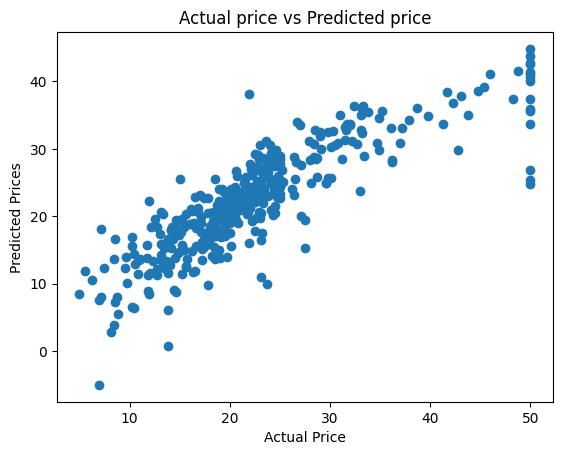

In [45]:
# Visualizing actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted price")
plt.show

In [46]:
# We compare Prediction with Y_test

test_data_prediction = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print(score_1, score_2)

0.7789207451814418 3.113043746893426


<function matplotlib.pyplot.show(close=None, block=None)>

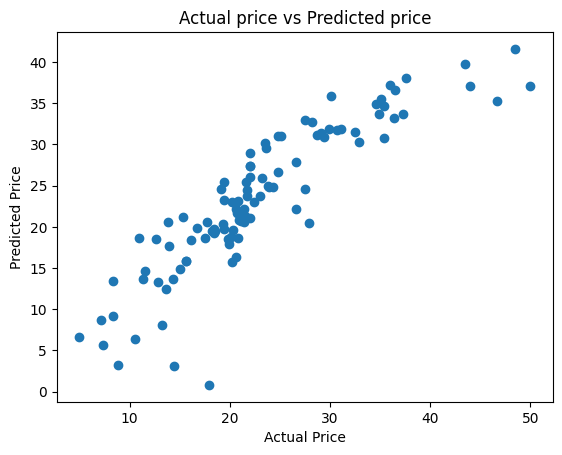

In [47]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show

Pickling The Model file For Deployment

In [48]:
import pickle

In [50]:
# Save the model using pickle
pickle.dump(model, open('regmodel.pkl', 'wb'))

In [51]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
